<a href="https://colab.research.google.com/github/nurfnick/Gradient-Descent/blob/main/Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Applying Gradient Descent</h1>

The Gradient Descent algorithm is an iterative, first order, algorithm used to find local minima/maxima of a given function, often called the cost or loss function. This algorithm was first developed way before modern computers and computing by Augustin-Louis Cauchy, in 1847, but is now popular in machine learning and deep learning to solve weights of functions used to train models to fit data.. For gradient descent to work, the cost function must be differentiable (can take a derivative) and convex on the specified interval. A convex function is a funciton whose second derivative is greater than or equal to 0. Convex functions are usually shaped like a cup.

The idea of gradient descent is to iteratively step in the direction opposite of the gradient, which is the derivative or vector of partial derivites in multidimensional cases. This is important because the gradient tells us the direction of the greatest change.

The first step of the algorithm is to have a starting point $x_0$, and apply the formula
$$x_{n+1}\leftarrow x_n-\alpha f'(x_n)$$
until convergence.

$x_n$ is the initial value of the function, called a guess, and is usually 0. The next parameter $\alpha$, is referred to as the learning rate and controls the step size of the algorithm. This parameter is usually small, $0\le \alpha \le 1$. The higher the learning rate, the increased risk of overshooting the optimal value. Lower learning rates have small step sizes and risks the speed of the algorithm. Smaller step sizes may also converge to the wrong value.

$x_n$ is plugged into the gradient has a weight of $\alpha$, and moves in the negative direction of the gradient.

Here is an example of applying gradient descent to find where the minimum occurs for the function $x^2$. We can easily observe that the minimum of $x^2$ occurs at $x=0$.

In [9]:
import numpy as np
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

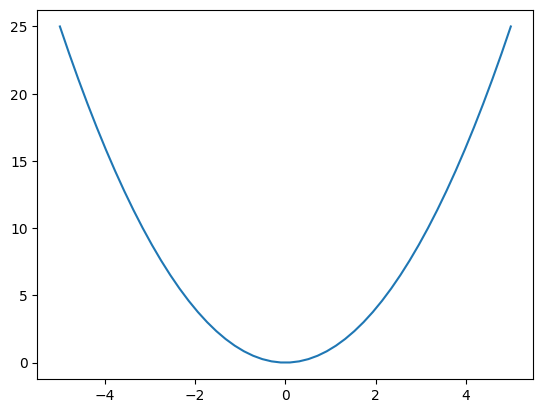

In [10]:
x_plot = np.linspace(-5,5)
plt.plot(x_plot, x_plot**2)

In [11]:
#create function for input
x, y = symbols('x'), symbols('y')
function = x**2

In [12]:

def gradient(function, start, learning_rate, iteration):
  solutions = []
  derivative = diff(function, x)
  callable_function = lambdify(x, function)
  callable_derivative = lambdify(x, derivative)

  x_new = start
  for i in range(1, iteration+1):
    x_new = x_new - learning_rate*callable_derivative(x_new)
    solutions.append(x_new)

  return solutions

In [13]:
solutions = gradient(function, 4, 0.2, 50)
solutions

[2.4,
 1.44,
 0.864,
 0.5184,
 0.31104,
 0.18662399999999998,
 0.11197439999999999,
 0.06718463999999999,
 0.04031078399999999,
 0.024186470399999993,
 0.014511882239999996,
 0.008707129343999996,
 0.005224277606399997,
 0.0031345665638399982,
 0.001880739938303999,
 0.0011284439629823994,
 0.0006770663777894395,
 0.0004062398266736637,
 0.0002437438960041982,
 0.0001462463376025189,
 8.774780256151133e-05,
 5.26486815369068e-05,
 3.158920892214408e-05,
 1.8953525353286447e-05,
 1.1372115211971869e-05,
 6.823269127183121e-06,
 4.093961476309872e-06,
 2.4563768857859235e-06,
 1.473826131471554e-06,
 8.842956788829324e-07,
 5.305774073297594e-07,
 3.183464443978556e-07,
 1.9100786663871338e-07,
 1.1460471998322802e-07,
 6.876283198993682e-08,
 4.125769919396209e-08,
 2.4754619516377255e-08,
 1.4852771709826352e-08,
 8.911663025895811e-09,
 5.346997815537487e-09,
 3.208198689322492e-09,
 1.924919213593495e-09,
 1.154951528156097e-09,
 6.929709168936581e-10,
 4.157825501361949e-10,
 2.4946

Through 50 iterations we can tell the pattern of the output is converging to 0. We can observe that the trend of the 50 iterations is getting closer and closer to 0, thus the algorithm works as expected.

Below is a graph of how the approximation is working.



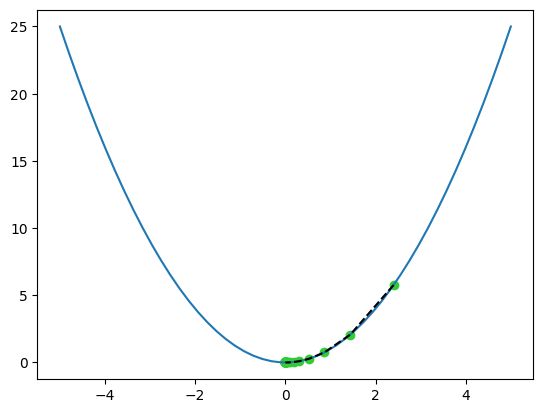

In [14]:
graph_func = lambda x: x**2
x_plot = np.linspace(-5,5)
plt.plot(x_plot, graph_func(x_plot))
sol = [graph_func(i) for i in solutions]

plt.plot(solutions, sol, c='black', linestyle='--')
plt.scatter(solutions, sol, c='#32cd32')

We can see the algorithm jumping around the graph until and converging to 0.


In this example, we used a fixed value of 0.1 for our learning rate.

Lets see what happens if we play with different learning rate values

In [15]:
solutions2 = gradient(function, -3, 0.2, 100)

Lets observe the function $x^3$ and see what happens when we apply gradient descent. We already know that the true minimum of this function is $0$.

In [16]:
cube_function = x**3
gradient(cube_function, 1, 0.05, 50)

[0.85,
 0.741625,
 0.65912385390625,
 0.5939572156880158,
 0.5410394395778368,
 0.49713088830103186,
 0.4600600202855859,
 0.4283117369458098,
 0.40079409534497934,
 0.3766987093154693,
 0.35541342167547824,
 0.33646561662941754,
 0.3194842499533454,
 0.30417372205810767,
 0.29029547407950523,
 0.27765475473884854,
 0.266090930314485,
 0.2554702728351408,
 0.2456805137897716,
 0.23662667656137068,
 0.22822784895229875,
 0.22041465629668977,
 0.2131272631901316,
 0.20631377864289424,
 0.19992897235420787,
 0.19393323325621642,
 0.1882917184120349,
 0.18297365272865135,
 0.17795174908972158,
 0.1732017253391079,
 0.16870189969004135,
 0.16443285004618702,
 0.16037712572004023,
 0.156519002351907,
 0.15284427263732156,
 0.14934006688561677,
 0.1459946985490067,
 0.1427975307483444,
 0.13973886053017073,
 0.13680981815883014,
 0.1340022792071323,
 0.1313087875822264,
 0.12872248792777924,
 0.12623706609303165,
 0.12384669656466518,
 0.12154599592716814,
 0.11932998155827906,
 0.11719403488

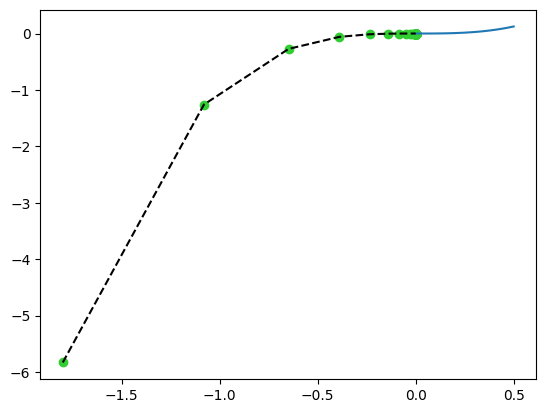

In [17]:
cube_graph_func = lambda x: x**3
sol = [cube_graph_func(i) for i in solutions2]
x_plot = np.linspace(0,.5)
plt.plot(x_plot, cube_graph_func(x_plot))
plt.plot(solutions2, sol, c='black', linestyle='--')
plt.scatter(solutions2, sol, c='#32cd32')

When we apply different learning rates, we can reach an overflow error.

<h1>Why Gradient Descent is important</h1>

Finding critical points is a simple topic that is learned in calculus; take the derivative of the function and set it equal to 0. The problem with this method is that when you add more dimensions to functions, derivatives become harder and harder. In the real world, there is never one variable. Businesses have multiple products, neural networks need multiple layers, thus we need optimizers like gradient descent to handle multivariate functions. In machine learning, models typically need more variables to make accurate predictions. Multiple regression, nearest neighbors, support vector machines, etc., are all different algorithms with multiple input variables that can be optimized with gradient descent.

Now, we will use a function of two variables to demonstrate. Instead of having a fixed learning rate, we will use an exponential decay algorihtm
$$\alpha = \alpha e^{0.9i}$$
where $i$ is the current iteration.

The function we will use is $$f(x,y)=x^2+y^2+2x+4yx-1$$

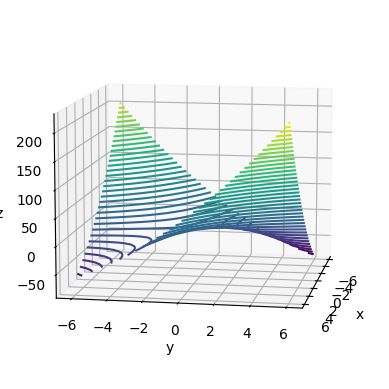

In [18]:
def f3d(x,y):
  return x**2+y**2+2*x+4*x*y-1

z_graph = lambda x,y: x**2+y**2+2*x+4*x*y-1

x_graph = np.linspace(-6, 6, 30)
y_graph = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x_graph, y_graph)
Z = f3d(X, Y)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(10,10)

In [19]:
# Exponential Decay Learning Rate Algorithm
def exp_decay(learning_rate, iteration):
  return learning_rate*np.exp(-0.9*iteration)

def gradient3D(function, x_initial, y_initial, learning_rate, iteration):
  callable_func = lambdify([x,y], function)
  new_vec = np.array([x_initial, y_initial]).T

  x_partial = diff(function, x)
  y_partial = diff(function, y)

  call_grad_func = lambdify([x,y], [x_partial, y_partial])

  for i in range(1, iteration+1):
    if i > 1:
      learning_rate = exp_decay(learning_rate, i)
    new_vec = new_vec - learning_rate*np.array(call_grad_func(new_vec[0], new_vec[1])).T
    print(i, new_vec, learning_rate)

In [20]:
f3d = x**2+y**2+2*x+4*y*x-1
gradient3D(f3d, 1, 1, .06, 50)

1 [0.52 0.64] 0.06
2 [0.46445957 0.60667574] 0.009917933293295192
3 [0.46088984 0.60462867] 0.0006665397922945383
4 [0.46079258 0.60457307] 1.8212348284731995e-05
5 [0.4607915  0.60457246] 2.0232091404835092e-07
6 [0.46079149 0.60457245] 9.13798784682757e-10
7 [0.46079149 0.60457245] 1.6780130735561562e-12
8 [0.46079149 0.60457245] 1.252780746987559e-15
9 [0.46079149 0.60457245] 3.8026798814240253e-19
10 [0.46079149 0.60457245] 4.692879791708968e-23
11 [0.46079149 0.60457245] 2.3546375147684755e-27
12 [0.46079149 0.60457245] 4.803343601459289e-32
13 [0.46079149 0.60457245] 3.98380631974843e-37
14 [0.46079149 0.60457245] 1.3433455600051666e-42
15 [0.46079149 0.60457245] 1.8416718016427996e-48
16 [0.46079149 0.60457245] 1.026530125590831e-54
17 [0.46079149 0.60457245] 2.3263021711667796e-61
18 [0.46079149 0.60457245] 2.1433619625715253e-68
19 [0.46079149 0.60457245] 8.028970803276125e-76
20 [0.46079149 0.60457245] 1.2228106270478447e-83
21 [0.46079149 0.60457245] 7.57170170954854e-92
22 

We can see that the learning rate is decaying at a fast rate. However, $x \text{ and } y$ seem to both get stuck after the 6th iteration. This is not because the learning rate became super small.

Notice, extrema of this function is a saddle point at $(\frac{1}{3},\frac{-2}{3})$. This means that $(\frac{1}{3},\frac{-2}{3})$, is a critical point, but it is neither a local minimum or maximum. Formally, the derivates in the orthogonal directions of this point are all 0, but it's not the highest or lowest point around it.

Lets see what happens on Dr. Jacobs function
$$f(x,y)=x^3+xy^2-x$$

In [21]:
drjacob = x**3+x*y**2-x
gradient3D(drjacob, 0, 0, .06, 50)

1 [0.06 0.  ] 0.06
2 [0.06981082 0.        ] 0.009917933293295192
3 [0.07046761 0.        ] 0.0006665397922945383
4 [0.07048556 0.        ] 1.8212348284731995e-05
5 [0.07048575 0.        ] 2.0232091404835092e-07
6 [0.07048576 0.        ] 9.13798784682757e-10
7 [0.07048576 0.        ] 1.6780130735561562e-12
8 [0.07048576 0.        ] 1.252780746987559e-15
9 [0.07048576 0.        ] 3.8026798814240253e-19
10 [0.07048576 0.        ] 4.692879791708968e-23
11 [0.07048576 0.        ] 2.3546375147684755e-27
12 [0.07048576 0.        ] 4.803343601459289e-32
13 [0.07048576 0.        ] 3.98380631974843e-37
14 [0.07048576 0.        ] 1.3433455600051666e-42
15 [0.07048576 0.        ] 1.8416718016427996e-48
16 [0.07048576 0.        ] 1.026530125590831e-54
17 [0.07048576 0.        ] 2.3263021711667796e-61
18 [0.07048576 0.        ] 2.1433619625715253e-68
19 [0.07048576 0.        ] 8.028970803276125e-76
20 [0.07048576 0.        ] 1.2228106270478447e-83
21 [0.07048576 0.        ] 7.57170170954854e-92
22 

Agian, the learning rate is adapting, but both $x \text{ and } y$ don't change after a few iterations. Both of these functions are non-convex around the saddle points.  

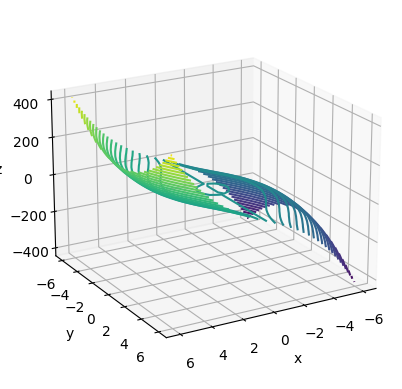

In [22]:
def dr_jacob(x,y):
  return x**3+x*y**2-x

Z = dr_jacob(X, Y)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(20, 60)

This function has not only one, but two saddle points at  (0,1) and (0,−1) . However, this function is different from the previous one because the only critical point is not a saddle point. There is a minimum at  (13√,0)  and a maximum at  (−13√,0) .

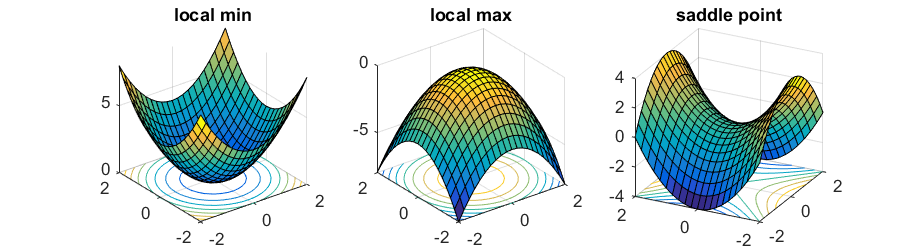

One common way to escape the saddle point problem is with Petrubed Gradient Descent. This algorithm works with smooth and non-convex functions. A function is smooth if for all $x,y$,
$$\Vert\nabla f(x)-\nabla f(y)\Vert \le \ell \Vert x-y \Vert$$
First order stationary points are critical points of a function, so its gradient is equal to 0. The graph is neither increasing or decreasing at these points. $x$ is a $\epsilon$-first-order stationary point if
$$\Vert f(x_n)\Vert \le \epsilon.$$ Notice, first-order stationary points are the values that gradient descent converges to. Both graphs we worked with are contain first order stationary point at their extrema.

Petrubed gradient descent can escaped these saddle points by converging to $\epsilon$-second order stationary points in the same time that gradient descent converges to a first=order stationary point. This requires the Hassian (a square matrix of second ordered partial derivatives of a scalar function) to be Hassian Lipschitz, which says for all $x,y$
$$\Vert \nabla^2 f(x)- \nabla^2 f(y)\Vert \le \rho \Vert x-y \Vert$$

To be a $\epsilon$-second order stationary point in a Hassian Lipschitz function,
$$\Vert \nabla f(x) \Vert \le \epsilon \text{ and } \lambda_{\min}(\nabla^2 f(x)) \ge -\sqrt{\rho \epsilon}$$
Second-order stationary points are important in optimization because for non-convex functions, they are the local minima.

With the previous conditions met, petrubed gradient descent works as follows:

1. for $n$ = 0,1,... **do**
2. if petrubation conditions are met
3.    $x_n \leftarrow x_n + \xi_n \text{ where } \xi_n \text{ uniformly } B_0(\frac{\epsilon}{\ell})$
4. $x_{n+1} \leftarrow x_n - \nabla f(x_n)$

<h1>Other Varients of Gradient Descent</h1>

Many optimizers have their own advantages and disadvantages. We just went over dealing with one of the saddle points, which is a weaknesses of the normal gradient descent.

<h2>Batch Gradient Descent</h2>
This optimizer takes the entire dataset and iteratively updates to calculate the cost function. Batch gradient descent is very slow because the entire dataset is passed through the model per iteration. Each iteration is called an epoch. The parameters are updated once per epoch. The disadvantage of batch gradient descent is that it is computationally heavy because it takes in the entire dataset per iteration.

<h2>Stoichastic Gradient Descent (SGD)</h2>
SGD is an optimizer that works better with smooth and non-convex functions. Instead of using the entire dataset to calculate the gradient at each iteration, SGD randomly picks one data point at each iteration to calculate the cost function. This greatly reduces the amount of computions and increases convergence speed. Since SGD picks random data points, the ouput heavily fluctuates to the optimal value.

<h2>Mini-batch Gradient Descent</h2>
Mini-batch gradient descent is in the middle of Batch gradient descent and stoichastic gradient descent. Instead of working with the entire dataset or a single random data point, mini-batch gradient descent takes a subset of the data to calculate the cost function. An advantage of mini-bathc gradient descent is that is has a faster learning process than SGD. Since it reads less data and batch-gradient descent and more reads more data than SGD, it can learn the training data at a high speed whithout too many computations.

<h2>AdaGrad</h2>
Adagrad is name comes from Adaptive Gradient. This optimizer works by adapting the learning rate for each parameter indivudually using previous gradient estimates. One major advantage of AdaGrad is the elimination of needing to manually tune the learning rate.


<h1>More Learning Rate Algorithms</h1>
<h2>Bold-Driver</h2>
The Bold-Driver algorithm works by comparing the error after each iteration. The error rate can be measured by any stastitical error function. If the error rate reduces, increase the learning rate by 1-5%. If the error rate increases, reset the learning rate to its previous value and then sharply decrease the learning rate by 50%. This is a good way to adapt your learning rate because the closer you get to the solution, the less your learning rate should be.

<h2>Cyclical Learning Rate</h2>
Cyclical learnig rate cycles between a lower and upper bound. Since the learning rate is cyclic, it will always return to its original value. With a cyclic learning rate, the model will not diverge from being to high, and will not converge at an efficient speed by never staying small.

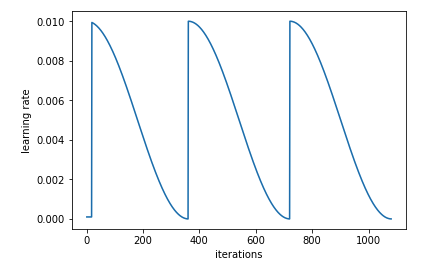

<h1>Linear Regression with Gradient Descent</h1>


Regression is an approximation analysis used to describe the relationship between one or more independent variable and a dependent variable. It forms the data to a line of 'best fit'. Linear regression is a form of regression which finds a linear relationship between the independent variables and the dependent variable.  

Below is a sample dataset titled All greens Franchise

In [24]:
data = pd.read_excel("https://github.com/yemioz/Gradient-Descent/raw/main/mlr05.xls")
data.rename(columns={"X1":"ANS", "X2": "SQFT", "X3": "Inventory", "X4": "Advertising Cost", \
                     "X5": "SOS District", "X6": "# of Competing Stores in District"}, inplace=True)
data.head(5)

,ANS,SQFT,Inventory,Advertising Cost,SOS District,# of Competing Stores in District
0,231.0,3.0,294,8.2,8.2,11
1,156.0,2.2,232,6.9,4.1,12
2,10.0,0.5,149,3.0,4.3,15
3,519.0,5.5,600,12.0,16.1,1
4,437.0,4.4,567,10.6,14.1,5


ANS is Annual Net Sales and SOS is Size of Sales district. All columns are in the thousands besides # of Competing Stores in District.

We will do linear regression on the data using gradient descent. Our predictor variable is advertising cost and we will use it to predict the annual net sales.

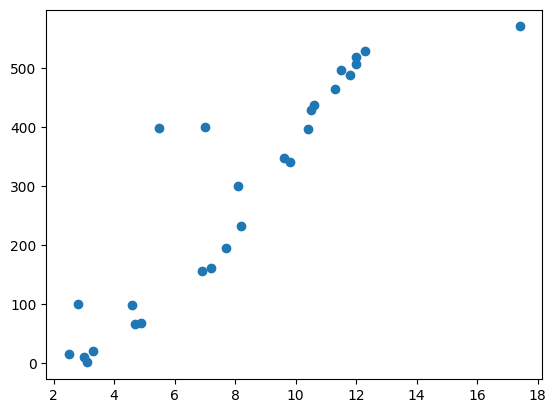

In [25]:
plt.scatter(data["Advertising Cost"], data["ANS"])

We will use the classic equation
$$y=mx_i+b$$
to estabilish a linear relationship between advertising cost, x, and annual sales, y. We have our $x \text{ and } y$ values, so we need to find optimal values for $m \text{ and } b$ so that we can create a line of best fit with minimum error.

To calculate our error, which is called the loss, we will use the Sum of Squares Error function, which is commonly used in stastistics.
$$SSE=\sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
MSE finds the difference between the actual value, and our predicted y-value, then averages it out by dividing by the number of elements. Since $\overline{y}_i$ is our predicted value, we can substitue it with $mx+b$:
$$SSE=\sum_{i=0}^{n}(y_i-(mx_i+b))^2$$

Now, using gradient descent, we will minimize the loss function using gradient descent.

We need to find the derivative of our loss function. Since we are minimizing both $m \text{ and } b$, we will have two derivatives, one with respect to $m$, and one with respect it $b$. This is called a partial derivative.
$$\begin{align*}
  D_m &= \frac{1}{n}\sum_{i=0}^{n}2(y_i-(mx_i+b))(-x_i)\\
  &= {-2}\sum_{i=0}^{n}(y_i-(mx_i+b))(x_i)\\
  &= -2\sum_{i=0}^{n}x_i(y_i-\hat{y_i})
\end{align*}$$
Now to find the partial derivative with respect to $b$.
$$\begin{align*}
  D_b &= \sum_{i=0}^{n}2(y_i-(mx_i+b))\\
  &= -2\sum_{i=0}^{n}(y_i-\hat{y_i})
\end{align*}$$


Now, we apply the gradient descent algorithm.
$$m_{n+1} \leftarrow m_n - \alpha D_m\\
  b_{n+1} \leftarrow b_n - \alpha D_b$$
We will initialize $m \text{ and } b$ to both be 0. We will also initilize our learning rate as 0.000009 and check how the accuracy improves with different learning rates.

In [29]:
# setting parameters
m = 0
b = 0
x_data = data["Advertising Cost"]
y_data = data["ANS"]
n = len(x_data)
learning_rate = .00009 # observe 0.00009, 0.0001, and 0.0003
iteration = 250

for i in range(iteration):
  y_prediction = m*x_data+b
  partial_m = -2*sum(x_data*(y_data-y_prediction))
  partial_b = -2*sum(y_data-y_prediction)
  m = m - learning_rate*partial_m
  b = b - learning_rate*partial_b

print(f"m: {m} \nb: {b}")

m: 38.70320007139672 
b: -13.865655721302433


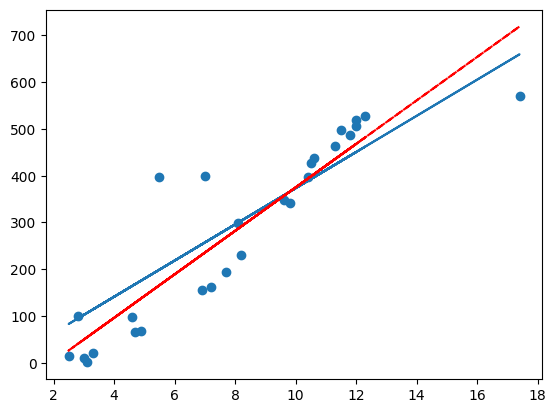

In [30]:
# new line
best_fit = m*x_data+b

check_m = stats.linregress(data['Advertising Cost'],data['ANS'])[0]
check_b = stats.linregress(data['Advertising Cost'],data['ANS'])[1]
check_fit = check_m*x_data+check_b

plt.scatter(data["Advertising Cost"], data["ANS"])
plt.plot(x_data, best_fit)
plt.plot(x_data, check_fit, c='red', linestyle='dashed')

In [31]:
print(check_m, check_b)

46.50909803983422 -90.14961922347737


Again, the accuracy of our model all comes down to what we choose our learning rate to be.

The linear regression solver got the values
\begin{align*}m&=46.50909803983422 \\
b&=-90.14961922347737
\end{align*}
I had to continously play with the learning rate to get values of $m=46.50618088545432 \text{ and } b=-90.14961922347737$.


<h1>End Notes</h1>

In the end, gradient descent is a very powerful algorithm for for optimization. There are different versions of this algorithm that have their advantages, but they all come with their challenges. If you have a bad initial guess, the algorithm may take longer to converge to the optimal value, depending on if the learning rate. If you have a bad learning rate, the algorithm may converge to the wrong value and lose accuracy. If you know what to set your learning rate as and the right method to adjust it, gradient descent is a very useful optimizer, otherwise you'll have to manually tune it until your model is sufficient.

Sources

Aggarwal, C. C., Aggarwal, L. F., & Lagerstrom-Fife. (2020). Linear algebra and optimization for machine learning (Vol. 156). Springer International Publishing.

Crypto1, C. (2023, November 6). How does the gradient descent algorithm work in machine learning?. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/

Guo, X., Han, J., & Tang, W. (2020). Perturbed gradient descent with occupation time. arXiv preprint arXiv:2005.04507.

Kwiatkowski, R. (2023, October 11). Gradient descent algorithm - a deep dive. Medium. https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21

Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

Singh, H. (2023, November 7). Variants of gradient descent algorithm. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/03/variants-of-gradient-descent-algorithm/